In [72]:
from tensorflow.keras.datasets.fashion_mnist import load_data
#((x_train, y_train),(x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()


In [73]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [74]:
trans = [
	"T-shirt",
	"Trouser",
	"Pullover",
	"Dress",
	"Coat",
	"Sandal",
	"Shirt",
	"Sneaker",
	"Bag",
	"boot"
]

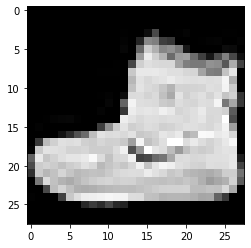

In [75]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")

In [ ]:
import pandas as pd
pd.DataFrame(x_train[0])

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
import os
if os.path.exists("mlp.h5"):
  print("load_model")
  model = load_model("mlp.h5")
else:
  layers = [
      # 784 * 256 + 256(bias)
      Dense(128, activation="relu", input_dim=784),
      Dropout(0.25),
      # 128 * 10 + 10(bias)
      Dense(10, activation="softmax")
  ]
  model = Sequential(layers)
  model.compile(loss=CategoricalCrossentropy(),
        metrics=["accuracy"],
        optimizer="adam")
model.summary()

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0])
print(y_train_cat[0])

In [79]:
x_train_shape = x_train.reshape(-1, 784) / 255.0
x_test_shape = x_test.reshape(-1, 784) /255.0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("mlp.h5", save_best_only=True)
]
model.fit(x_train_shape,
     y_train_cat,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

In [ ]:
# model.save("mlp.h5")
model.evaluate(x_test_shape, y_test_cat)

In [ ]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_shape)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       columns=[trans[i] + "(預測)" for i in range(10)],
       index=[trans[i] + "(正確)" for i in range(10)])

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test)[0][:200]
false_img = x_test[idx]
false_pre = pre[idx]
false_label = y_test[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
  plt.subplot(height, width, i+1)
  plt.imshow(false_img[i])
  t = "[O]:{}\n[P]:{}".format(trans[false_label[i]], trans[false_pre[i]])
  plt.title(t)
  plt.axis("off")

In [ ]:
import requests
from PIL import Image
# RGB, RGBA, L(gray)
url = input("url:")
headers = {
  "user-agent":"user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36"  
}
response = requests.get(url, headers=headers, stream=True, verify=False)
img = Image.open(response.raw).resize((28, 28)).convert("L")
img_np = 255 - np.array(img)
img_np_r = img_np.reshape(1, 784) / 255.0
proba = model.predict(img_np_r)[0]
for i in range(10):
    print(trans[i], "的機率:", proba[i])
ans = model.predict_classes(img_np_r)[0]
print("答案:", trans[ans])
plt.imshow(img_np, "gray")